Ryan Malmfelt

Data Projects

NHL Skater Expected Goals By Danger Level


Introduction:

Hockey has always been a game of speed, skill, and chaos. For years, the story of a game was told almost entirely through the basics: goals, assists, shots on net, and saves. While those numbers captured the highlights, they didn’t always explain why one team dominated play or how a goalie managed to “steal” a win. That’s where advanced stats have started to change the way we look at the NHL.

Over the last decade, analytics have given fans and teams new tools to understand the game on a deeper level. Instead of just counting shots, we can now measure the quality of those shots. Expected goals has become one of the most talked about metrics, estimating how likely a shot is to result in a goal based on where it’s taken, how it’s taken, and what led up to it. When you add in danger levels, separating low-percentage perimeter shots from the high-danger looks right in front of the crease you get a much clearer picture of which teams are generating real scoring chances versus just firing pucks from the outside.

This project takes a closer look at how expected goals and danger levels connect. By digging into these numbers, we can see which players and teams are consistently creating offense that actually threatens goaltenders, and which ones might be racking up empty shot totals. It’s another step in how analytics have grown the game — moving past the box score and helping us see the battles beneath the surface.


Dataset Description:

For this project, I used 2024 data from Moneypuck.com, one of the go to sites for hockey analytics fans. Moneypuck doesn’t just track goals and assists, it digs into the details behind every shot in the NHL. Each attempt is logged with information like where it came from on the ice, what kind of shot it was, whether it was a rebound or off the rush, and how likely it was to go in based on past results (that’s the “expected goals” stat, or xG).

The site also labels chances as low-, medium-, or high-danger, depending on how threatening they really were. A floater from the blue line isn’t the same as a one-timer from the slot, and Moneypuck helps separate those out. That makes it a perfect dataset for exploring the connection between expected goals and danger levels, and for seeing which players/teams are generating real offensive pressure instead of just piling up empty shot totals. 


Data Preprocessing:

After importing the dataset from Moneypuck.com, the first step was to examine its structure. I used .info() to review the number of rows and columns, confirm the datatypes of each variable, and check for any potential issues like non-numeric values in numeric columns. This was important because the dataset included a mix of numerical features (such as expected goals and shot distance) and categorical features (like shot type or danger level).

Next, I ran .describe() to generate summary statistics, which provided a quick look at the distributions of key variables, including measures of central tendency and spread. To ensure data quality, I also checked for missing values using .isnull() and .isnull().sum(). The results showed that the dataset contained zero null values, which meant I could move forward without needing to drop rows or apply imputation methods.

By completing these steps: confirming datatypes, reviewing descriptive statistics, and verifying that no missing data was present, I was able to prepare the dataset for deeper exploration of the relationship between expected goals and shot danger levels.



In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [33]:
skaters = pd.read_csv(r'C:\Users\malmf\Downloads\skaters.csv')
skaters

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8478047,2024,Michael Bunting,NSH,L,other,76,2237.0,37.0,26.19,...,7.28,10.09,72.0,87.0,0.00,0.00,0.0,0.0,0.0,0.0
1,8478047,2024,Michael Bunting,NSH,L,all,76,70819.0,1474.0,43.70,...,161.54,187.75,3221.0,3522.0,0.00,0.00,0.0,0.0,0.0,0.0
2,8478047,2024,Michael Bunting,NSH,L,5on5,76,59813.0,1294.0,43.70,...,112.73,122.08,2661.0,2707.0,0.71,1.71,19.0,43.0,16.0,31.0
3,8478047,2024,Michael Bunting,NSH,L,4on5,76,6.0,2.0,2.58,...,0.20,0.17,4.0,11.0,0.00,0.00,0.0,0.0,0.0,0.0
4,8478047,2024,Michael Bunting,NSH,L,5on4,76,8763.0,141.0,36.88,...,23.81,2.60,311.0,54.0,0.00,0.01,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,8477953,2024,Kasperi Kapanen,EDM,R,other,67,484.0,5.0,3.75,...,5.13,3.50,34.0,49.0,0.38,0.00,2.0,0.0,1.0,0.0
4596,8477953,2024,Kasperi Kapanen,EDM,R,all,67,47917.0,1013.0,13.44,...,192.40,154.20,3400.0,3081.0,0.00,0.00,0.0,0.0,0.0,0.0
4597,8477953,2024,Kasperi Kapanen,EDM,R,5on5,67,43719.0,901.0,13.44,...,122.38,102.47,2718.0,2401.0,0.52,0.64,24.0,26.0,17.0,20.0
4598,8477953,2024,Kasperi Kapanen,EDM,R,4on5,67,2604.0,77.0,6.55,...,2.28,18.93,39.0,264.0,0.00,0.00,0.0,0.0,0.0,0.0


In [34]:
skaters.describe()

,playerId,season,games_played,icetime,shifts,gameScore,onIce_xGoalsPercentage,offIce_xGoalsPercentage,onIce_corsiPercentage,offIce_corsiPercentage,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
count,4.600000e+03,4600.0,4600.000000,4600.000000,4600.00000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,8.479531e+06,2024.0,51.330435,20354.040435,425.34087,19.261365,0.432098,0.469054,0.439189,0.465161,...,42.301907,42.720841,842.493913,850.394783,0.400274,0.163211,9.086739,4.028478,6.903478,3.148913
std,2.907388e+03,0.0,29.587575,29516.343274,611.91521,23.122688,0.297590,0.271816,0.283860,0.257845,...,58.065706,58.150014,1196.582565,1199.245597,1.163014,0.435200,25.489777,10.273360,19.423968,8.017905
min,8.470600e+06,2024.0,1.000000,0.000000,0.00000,-6.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.477426e+06,2024.0,21.000000,401.750000,14.00000,0.900000,0.130000,0.330000,0.180000,0.330000,...,2.030000,1.800000,33.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.479592e+06,2024.0,63.000000,4226.000000,83.00000,9.540000,0.470000,0.490000,0.480000,0.490000,...,11.575000,11.910000,123.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.482057e+06,2024.0,78.000000,34109.750000,764.50000,31.250000,0.570000,0.570000,0.580000,0.550000,...,81.432500,83.285000,1745.500000,1773.000000,0.100000,0.030000,2.000000,1.000000,2.000000,1.000000
max,8.485512e+06,2024.0,85.000000,129982.000000,2658.00000,134.880000,1.000000,1.000000,1.000000,1.000000,...,249.510000,238.130000,4697.000000,4312.000000,9.290000,3.810000,223.000000,79.000000,163.000000,62.000000


In [35]:
skaters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 154 entries, playerId to fenwickAgainstAfterShifts
dtypes: float64(147), int64(3), object(4)
memory usage: 5.4+ MB


In [36]:
skaters.dtypes

playerId                       int64
season                         int64
name                          object
team                          object
position                      object
                              ...   
xGoalsAgainstAfterShifts     float64
corsiForAfterShifts          float64
corsiAgainstAfterShifts      float64
fenwickForAfterShifts        float64
fenwickAgainstAfterShifts    float64
Length: 154, dtype: object

In [39]:
skaters.isnull()

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
skaters.isnull().sum()

playerId                     0
season                       0
name                         0
team                         0
position                     0
                            ..
xGoalsAgainstAfterShifts     0
corsiForAfterShifts          0
corsiAgainstAfterShifts      0
fenwickForAfterShifts        0
fenwickAgainstAfterShifts    0
Length: 154, dtype: int64

NHL Superstars

To make the analysis more meaningful, I decided to focus on a group of 11 of the NHL’s top players. These players are widely recognized as some of the league’s most impactful talents, combining skill, consistency, and the ability to influence games in different ways.

Connor McDavid & Leon Draisaitl (Edmonton Oilers): McDavid is arguably the best player in the world, known for his unmatched speed and playmaking, while Draisaitl adds elite scoring ability and vision. Together, they form the league’s most dangerous duo, often driving Edmonton’s offensive numbers to the top.

Auston Matthews (Toronto Maple Leafs): One of the league’s premier goal scorers, Matthews consistently leads in shot generation and excels at creating high-danger looks from the slot.

David Pastrňák (Boston Bruins): A lethal shooter with a quick release, Pastrňák is a constant threat on the power play and thrives on generating high xG chances from the right wing.

Alexander Ovechkin (Washington Capitals): The NHL’s all-time goals leader, Ovechkin is famous for his “office” on the power play. Even later in his career, he remains one of the most consistent high-volume shooters in the game.

Sidney Crosby (Pittsburgh Penguins): A generational talent, Crosby has evolved from pure scorer to all-around playmaker. He excels in creating high-quality scoring chances for both himself and his teammates.

Nikita Kucherov (Tampa Bay Lightning): Known for his vision and creativity, Kucherov blends scoring and playmaking. His ability to break down defenses makes him one of the most efficient offensive players in the league.

Mikko Rantanen (Dallas Stars): Rantanen finally settled down with the Dallas Stars after being traded twice this past year. Once being traded from the Colorado Avalanche to the Carolina Hurricanes and then at the trade deadline to the Stars where he signed a massive contract extension. Looking past all that drama, Rantanen's size, puck skills, and lethal finsishing ability make him an unstoppable force when on the ice. 

Nathan MacKinnon (Colorado Avalanche): The Avalanche’s dynamic superstar, MacKinnon’s speed and play making ability make him among the leagues leaders in high-danger scoring chance creation.

Cale Makar & Quinn Hughes (Colorado Avalanche, Vancouver Canucks): Two of the NHL’s elite defensemen, Makar and Hughes represent the new wave of blueliners who can not only shut down opponents but also drive offense. Both are exceptional skaters and puck movers, regularly jumping into the play to create high-danger opportunities.

By focusing on this group, the project highlights players who consistently generate or influence high-quality scoring chances, making them perfect examples for analyzing the relationship between expected goals and danger levels.







In [59]:
top_players = ['Connor McDavid', 'Leon Draisaitl', 'Auston Matthews', 
               'David Pastrnak', 'Alex Ovechkin','Sidney Crosby','Nikita Kucherov', 'Mikko Rantanen','Nathan Mackinnon', 'Cale Makar', 'Quinn Hughes'] 

In [60]:
top_skaters = skaters[skaters['name'].isin(top_players)]

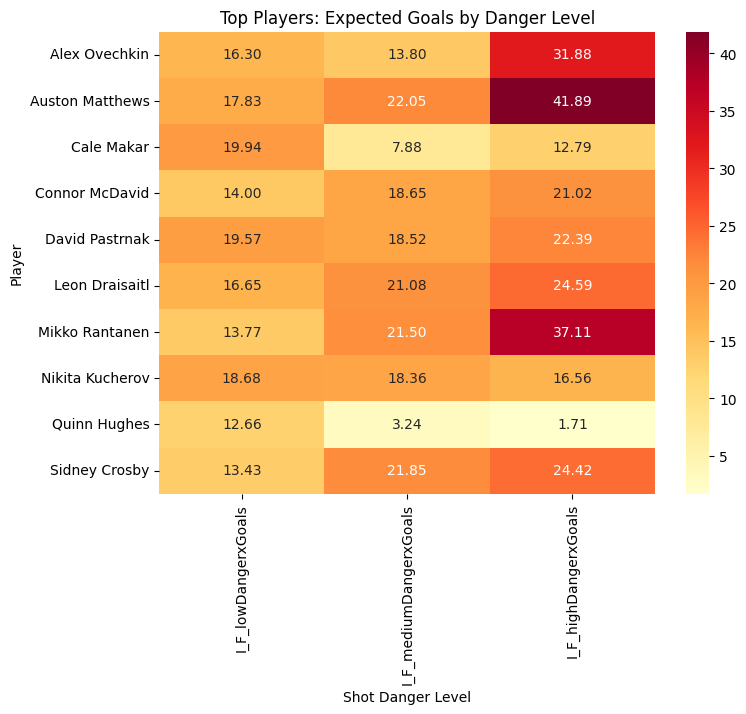

In [61]:
heatmap_data = top_skaters.groupby('name')[['I_F_lowDangerxGoals', 'I_F_mediumDangerxGoals', 'I_F_highDangerxGoals']].sum()

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Top Players: Expected Goals by Danger Level")
plt.xlabel("Shot Danger Level")
plt.ylabel("Player")
plt.show()

 Expected Goals by Danger Level Results (Heatmap):


The heatmap above shows the distribution of expected goals (xG) for 11 of the NHL’s top players, broken down by shot danger level (low, medium, and high). Darker shades represent higher values, meaning that player generated more xG in that danger category.

A few key takeaways stand out:

Auston Matthews, Mikko Rantanen, and Alex Ovechkin dominate in high-danger chances. Matthews leads all players with over 41.8 expected goals from high-danger areas, while Rantanen and Ovechkin are close behind at 37.1 and 31.88. This reflects their reputations as elite finishers who consistently find space in the slot and net-front areas.

Leon Draisaitl and Sidney Crosby excel at medium- and high-danger scoring chances. Both generate strong xG totals in the middle categories, highlighting their ability to create offense from prime areas, especially around the crease.

David Pastrňák and Connor McDavid balance across all categories. Each produces steady contributions across low, medium, and high danger levels, showing their versatility in creating chances from anywhere on the ice.

Defensemen Cale Makar and Quinn Hughes stand out differently. Makar’s totals skew toward low-danger chances (shots from the point), while Hughes has relatively low expected goal values overall, which fits his role as more of a play-driver and setup man rather than a shooter.

Nikita Kucherov generates efficient chances without relying heavily on high-danger shots. His totals are spread fairly evenly, which mirrors his playstyle as a creative passer and deceptive shooter.

Overall, this visualization reinforces the idea that elite goal scorers like Matthews and Rantanen thrive by generating consistent high-danger chances, while others, like Hughes or Kucherov, impact the game in different ways that don’t always show up in raw shooting metrics.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [64]:
features = ['icetime', 'shifts', 'I_F_shotAttempts', 'I_F_shotsOnGoal', 
            'I_F_missedShots', 'I_F_blockedShotAttempts',
            'I_F_lowDangerShots', 'I_F_mediumDangerShots', 'I_F_highDangerShots',
            'I_F_primaryAssists', 'I_F_secondaryAssists',
            'onIce_corsiPercentage', 'onIce_fenwickPercentage', 'onIce_xGoalsPercentage']

X = skaters[features]
y = skaters['I_F_xGoals']


X = X.fillna(0)
y = y.fillna(0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.3f}")

RMSE: 0.489


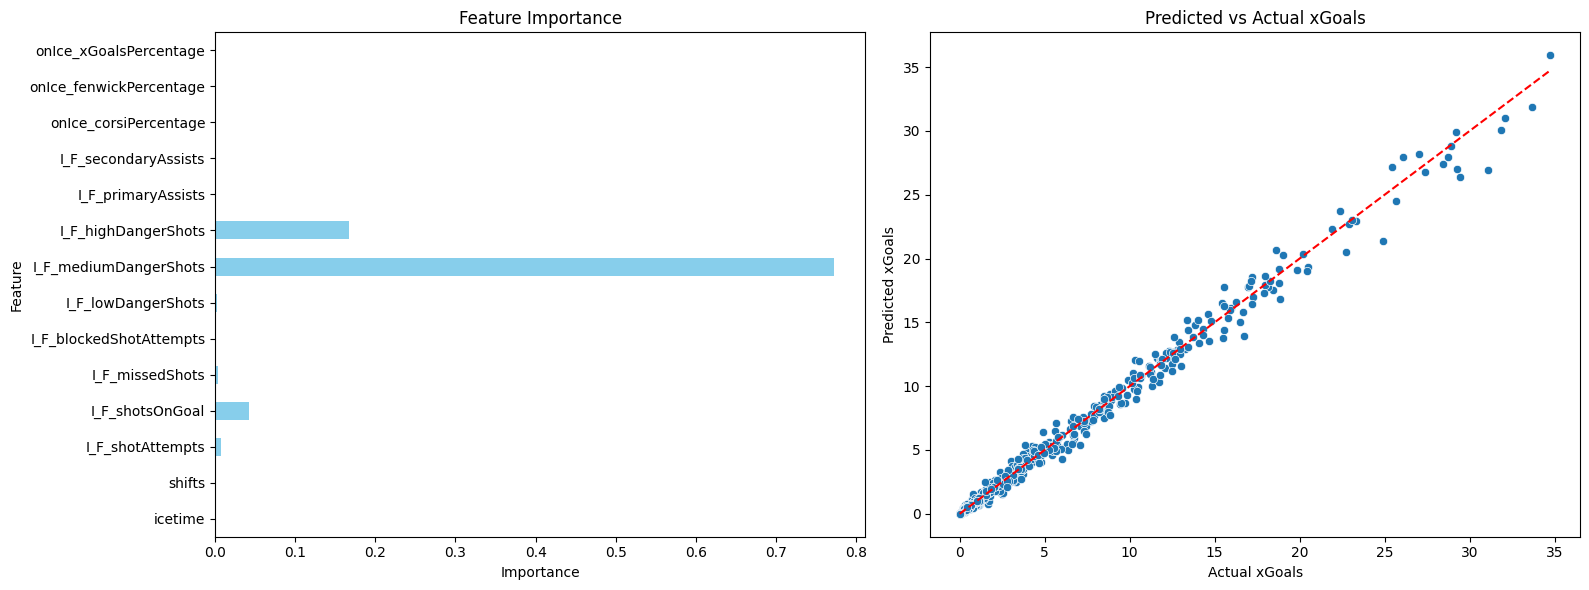

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))


feat_importances.plot(kind='barh', color='skyblue', ax=axes[0])
axes[0].set_title("Feature Importance")
axes[0].set_xlabel("Importance")
axes[0].set_ylabel("Feature")


sns.scatterplot(x=y_test, y=y_pred, ax=axes[1])
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[1].set_title("Predicted vs Actual xGoals")
axes[1].set_xlabel("Actual xGoals")
axes[1].set_ylabel("Predicted xGoals")

plt.tight_layout()
plt.show()

Feature Importance/Random Forest Regressor Models:


In order to look fully more in depth at what drives expected goals, I created a feature importance model(left plot) and a precited vs actual expected goals regression model(right plot).

The feature importance chart shows which variables contribute the most to predicting expected goals. Medium danger shots dominate as the most influential feature, meaning they are the strongest predictor of a player’s expected goals. High danger shots and shots on goal also carry meaningful weight, reinforcing that shot quality and attempts directly drive expected scoring.

Features like total ice time, shifts, or even overall possession stats (like Corsi and Fenwick) don’t strongly predict scoring chances by themselves. They may help set the stage, but they’re not what drives expected goals directly.

This strenghtens the importance of getting pucks into scoring areas rather than just firing from the perimeter or relying on raw possession numbers.

For the regression plot Each dot represents a player’s predicted xGoals compared to their actual expected goals. The red dashed line represents perfect prediction. The points are tightly clustered along the line, showing the model predicts very accurately. A few outliers appear at higher expected goals (25+), where the model slightly under- or overestimates, but the overall trend is strong.


Conclusion:

Together, the heatmap and modeling results emphasize a clear message: elite players separate themselves by consistently creating high and medium-danger scoring chances. Possession, ice time, and volume shooting all play a role in setting the stage, but what really drives expected goals is the ability to get into prime areas and take shots that have a true chance of beating goaltenders.

This distinction helps explain why players like Auston Matthews and Mikko Rantanen stand out so clearly at the top of the charts, their games are built around consistently generating and finishing from the most dangerous spots on the ice. Others, like Quinn Hughes or Nikita Kucherov, may not lead in high-danger chances but still make their impact by driving play, creating space, and setting up teammates for those same high-quality opportunities.

In short, the numbers back up what fans see on the ice: the most dangerous players aren’t necessarily the ones with the most ice time or the highest shot totals, but the ones who turn those opportunities into meaningful, high-probability scoring chances. For teams and analysts, this reinforces the growing importance of advanced stats like expected goals and danger level — not just to describe what happened in a game, but to predict which players and strategies are most likely to succeed in the long run.